# Applying `MCube` to the rotated dataset

In [1]:
set.seed(20240709)

library(MCube)
library(ggplot2)

max_cores <- 36

In [3]:
DATA_PATH <- "/import/home/share/zw/pql/data/mouse_brain"
RESULT_PATH <- "/import/home/share/zw/pql/results/mouse_brain"

if (!dir.exists(file.path(RESULT_PATH, "visium_1"))) {
    dir.create(file.path(RESULT_PATH, "visium_1"), recursive = TRUE)
}
if (!dir.exists(file.path(RESULT_PATH, "visium_2"))) {
    dir.create(file.path(RESULT_PATH, "visium_2"), recursive = TRUE)
}
if (!dir.exists(file.path(RESULT_PATH, "ST_3D"))) {
    dir.create(file.path(RESULT_PATH, "ST_3D"), recursive = TRUE)
}

## 10x Visium Slice 1

In [4]:
# reference_ST <- data.matrix(
#     read.csv(file.path(DATA_PATH, "visium_1", "reference_ST.csv"),
#         header = TRUE, row.names = 1, check.names = FALSE
#     )
# )
# dim(reference_ST)
# num_celltypes <- nrow(reference_ST)

# proportions_ST <- read.csv(
#     file.path(DATA_PATH, "visium_1", paste0("prop_slice", 0, ".csv")),
#     header = TRUE, row.names = 1, check.names = FALSE
# )
# dim(proportions_ST)

# counts <- as.data.frame(readr::read_csv(
#     file.path(DATA_PATH, "visium_1", "counts.csv")
# ))
# rownames(counts) <- counts[, 1]
# counts[, 1] <- NULL
# dim(counts)

# coordinates <- as.data.frame(readr::read_csv(
#     file.path(DATA_PATH, "visium_1", "3D_coordinates.csv")
# ))
# rownames(coordinates) <- coordinates[, 1]
# coordinates[, c(1, 4)] <- NULL
# dim(coordinates)

# spot_effects_ST <- data.matrix(read.csv(
#     file.path(DATA_PATH, "visium_1", "spot_effects_ST.csv"),
#     header = TRUE, row.names = 1, check.names = FALSE
# ))[, 1]

# library_sizes_ST <- data.matrix(read.csv(
#     file.path(DATA_PATH, "visium_1", "library_sizes_ST.csv"),
#     header = TRUE, row.names = 1, check.names = FALSE
# ))[, 1]

In [5]:
# # Real case

# mcube_object_1 <- createMCube(
#     counts = as.matrix(counts), coordinates = as.matrix(coordinates), 
#     proportions = as.matrix(proportions_ST), library_sizes = library_sizes_ST, 
#     covariates = NULL,
#     reference = as.matrix(reference_ST),
#     spot_effects = spot_effects_ST, platform_effects = NULL,
#     project = "mouse_brain_visium_1"
# )
# mcube_object_1 <- mcubeFitNull(mcube_object_1, max_cores = max_cores)
# mcube_object_1 <- mcubeTest(mcube_object_1, max_cores = max_cores)
# saveRDS(
#     mcube_object_1,
#     file = file.path(
#         RESULT_PATH, "visium_1",
#         paste0("mcube", ".rds")
#     )
# )
mcube_object_1 <- readRDS(
    file = file.path(
        RESULT_PATH, "visium_1",
        paste0("mcube", ".rds")
    )
)

In [6]:
# Rotate 45 degree

degrees <- 45
coordinates_rotation <- mcube_object_1@coordinates %*% rotation_matrix_2d(degrees)
rownames(coordinates_rotation) <- rownames(mcube_object_1@coordinates)
mcube_object_1_rotation <- mcube_object_1
mcube_object_1_rotation@coordinates <- coordinates_rotation

mcube_object_1_rotation <- mcubeTest(mcube_object_1_rotation, max_cores = max_cores)
pvalues_1_rotation <- mcube_object_1_rotation@pvalues
rm(mcube_object_1_rotation)
saveRDS(
    pvalues_1_rotation,
    file = file.path(
        RESULT_PATH, "visium_1",
        paste0("pvalues_rotation", ".rds")
    )
)

# pvalues_1_rotation <- readRDS(
#     file = file.path(
#         RESULT_PATH, "visium_1",
#         paste0("pvalues_rotation", ".rds")
#     )
# )

mcubeKernel: length scale is set as 0.101059327818091 for the Gaussian kernel.

mcubeKernel: length scale is set as 0.142919472004653 for the Gaussian kernel.

mcubeKernel: length scale is set as 0.101059327818091 for the Gaussian_transformed kernel.

mcubeKernel: length scale is set as 0.142919472004653 for the Gaussian_transformed kernel.

Number of cores used: 36.



## 10x Visium Slice 2

In [7]:
# reference_ST <- data.matrix(
#     read.csv(file.path(DATA_PATH, "visium_2", "reference_ST.csv"),
#         header = TRUE, row.names = 1, check.names = FALSE
#     )
# )
# dim(reference_ST)
# num_celltypes <- nrow(reference_ST)

# proportions_ST <- read.csv(
#     file.path(DATA_PATH, "visium_2", paste0("prop_slice", 0, ".csv")),
#     header = TRUE, row.names = 1, check.names = FALSE
# )
# dim(proportions_ST)

# counts <- as.data.frame(readr::read_csv(
#     file.path(DATA_PATH, "visium_2", "counts.csv")
# ))
# rownames(counts) <- counts[, 1]
# counts[, 1] <- NULL
# dim(counts)

# coordinates <- as.data.frame(readr::read_csv(
#     file.path(DATA_PATH, "visium_2", "3D_coordinates.csv")
# ))
# rownames(coordinates) <- coordinates[, 1]
# coordinates[, c(1, 4)] <- NULL

# shuffle_idx <- sample(1:nrow(coordinates), nrow(coordinates))
# write.csv(shuffle_idx, file = file.path(DATA_PATH, "visium_2", "shuffle_idx.csv"), row.names = FALSE)
# shuffle_idx <- read.csv(file.path(DATA_PATH, "visium_2", "shuffle_idx.csv"), header = TRUE)[, 1]
# length(unique(shuffle_idx))

# coordinates_shuffle <- coordinates[shuffle_idx, ]
# rownames(coordinates_shuffle) <- rownames(coordinates)
# write.csv(coordinates_shuffle, file = file.path(DATA_PATH, "visium_2", "coordinates_shuffle.csv"))
# coordinates_shuffle <- read.csv(
#     file.path(DATA_PATH, "visium_2", "coordinates_shuffle.csv"),
#     header = TRUE, row.names = 1
# )

# dim(coordinates)
# dim(coordinates_shuffle)

# spot_effects_ST <- data.matrix(read.csv(
#     file.path(DATA_PATH, "visium_2", "spot_effects_ST.csv"),
#     header = TRUE, row.names = 1, check.names = FALSE
# ))[, 1]

# library_sizes_ST <- data.matrix(read.csv(
#     file.path(DATA_PATH, "visium_2", "library_sizes_ST.csv"),
#     header = TRUE, row.names = 1, check.names = FALSE
# ))[, 1]

In [8]:
# Real case

# mcube_object_2 <- createMCube(
#     counts = as.matrix(counts), coordinates = as.matrix(coordinates), 
#     proportions = as.matrix(proportions_ST), library_sizes = library_sizes_ST, 
#     covariates = NULL,
#     reference = as.matrix(reference_ST),
#     spot_effects = spot_effects_ST, platform_effects = NULL,
#     project = "mouse_brain_visium_2"
# )
# mcube_object_2 <- mcubeFitNull(mcube_object_2, max_cores = max_cores)
# mcube_object_2 <- mcubeTest(mcube_object_2, max_cores = max_cores)
# saveRDS(
#     mcube_object_2,
#     file = file.path(
#         RESULT_PATH, "visium_2",
#         paste0("mcube", ".rds")
#     )
# )
mcube_object_2 <- readRDS(
    file = file.path(
        RESULT_PATH, "visium_2",
        paste0("mcube", ".rds")
    )
)

In [9]:
# Rotate 45 degree

degrees <- 45
coordinates_rotation <- mcube_object_2@coordinates %*% rotation_matrix_2d(degrees)
rownames(coordinates_rotation) <- rownames(mcube_object_2@coordinates)
mcube_object_2_rotation <- mcube_object_2
mcube_object_2_rotation@coordinates <- coordinates_rotation

mcube_object_2_rotation <- mcubeTest(mcube_object_2_rotation, max_cores = max_cores)
pvalues_2_rotation <- mcube_object_2_rotation@pvalues
rm(mcube_object_2_rotation)
saveRDS(
    pvalues_2_rotation,
    file = file.path(
        RESULT_PATH, "visium_2",
        paste0("pvalues_rotation", ".rds")
    )
)

pvalues_2_rotation <- readRDS(
    file = file.path(
        RESULT_PATH, "visium_2",
        paste0("pvalues_rotation", ".rds")
    )
)

mcubeKernel: length scale is set as 0.104577495815249 for the Gaussian kernel.

mcubeKernel: length scale is set as 0.147894912900941 for the Gaussian kernel.

mcubeKernel: length scale is set as 0.104577495815249 for the Gaussian_transformed kernel.

mcubeKernel: length scale is set as 0.147894912900941 for the Gaussian_transformed kernel.

Number of cores used: 36.



## Comparing the results before and after rotation

In [10]:
pvalues_plot_df <- rbind(
    data.frame(
        merge(
            mcubePvalueList2LongTable(mcube_object_1@pvalues),
            mcubePvalueList2LongTable(pvalues_1_rotation),
            by = c("celltype", "gene"),
            suffixes = c("", "_rotation")
        ),
        slice = "Slice 1"
    ),
    data.frame(
        merge(
            mcubePvalueList2LongTable(mcube_object_2@pvalues),
            mcubePvalueList2LongTable(pvalues_2_rotation),
            by = c("celltype", "gene"),
            suffixes = c("", "_rotation")
        ),
        slice = "Slice 2"
    )
)
head(pvalues_plot_df)

,celltype,gene,pvalue,pvalue_rotation,slice
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Ext_Hpc_CA1,1110051M20Rik,2.421397e-01,3.171503e-01,Slice 1
2,Ext_Hpc_CA1,2010300C02Rik,4.475609e-07,9.574787e-09,Slice 1
3,Ext_Hpc_CA1,2900026A02Rik,5.717366e-01,5.201138e-01,Slice 1
4,Ext_Hpc_CA1,4930402H24Rik,1.633465e-05,1.309677e-05,Slice 1
5,Ext_Hpc_CA1,4932438A13Rik,3.880754e-01,4.855843e-01,Slice 1
6,Ext_Hpc_CA1,Aagab,6.003943e-01,4.862543e-01,Slice 1


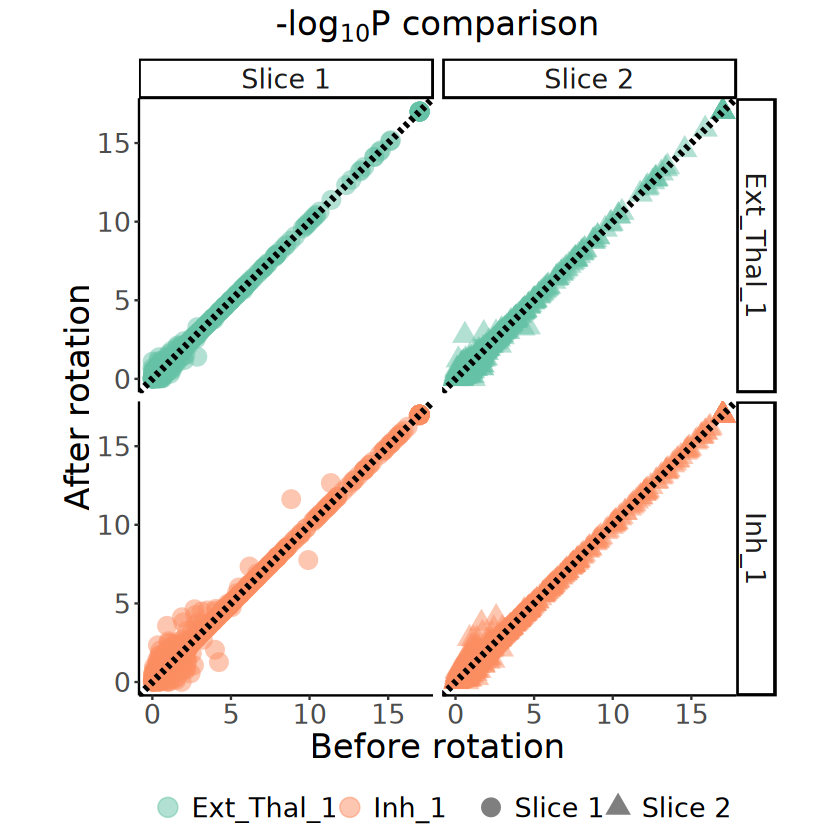

In [11]:
demo_celltypes <- c("Ext_Thal_1", "Inh_1")
p <- ggplot(
    data = pvalues_plot_df[pvalues_plot_df$celltype %in% demo_celltypes, ],
    aes(x = -log10(pvalue), y = -log10(pvalue_rotation))
) +
    geom_point(aes(color = celltype, shape = slice), size = 5, alpha = 0.5) +
    scale_color_brewer(palette = "Set2") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black", linewidth = 1.5) +
    scale_x_continuous(limits = c(0, 17), oob = scales::oob_squish) +
    scale_y_continuous(limits = c(0, 17), oob = scales::oob_squish) +
    coord_fixed(ratio = 1) +
    facet_grid(celltype ~ slice) +
    labs(
        x = "Before rotation",
        y = "After rotation",
        title = expression(paste("-log"[10], plain("P"), " comparison")),
    ) +
    theme_classic() +
    theme(
        plot.title = element_text(size = 20, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 16),
        strip.text = element_text(size = 16),
        legend.title = element_blank(),
        legend.text = element_text(size = 16),
        legend.position = "bottom"
    )
ggsave(
    filename = file.path(
        RESULT_PATH,
        paste0("pvalues_rotation_comparison", ".pdf")
    ),
    plot = p, device = "pdf", width = 8, height = 8
)
p